In [22]:
#single layer perceptron with softmax

#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
X=np.array([[0,0],[0,1],[1,0],[1,1],[2,2],[2,3],[3,2],[3,3]])
y=np.array([0,1,1,0,2,2,2,2])

In [24]:
#one hot encoding for the labels
y_one_hot=np.eye(3)[y]


In [25]:
#parameters
lr=0.1
epochs=1000
num_classes=3


In [26]:
#initialize weights
weights=np.random.randn(3,X.shape[1]+1)-0.5


In [27]:
#Add bias to input
X_bias =np.c_[np.ones(X.shape[0]),X]

In [37]:
#softmax function
def softmax(x):
    exp_x=np.exp(x-np.max(x))
    return exp_x/exp_x.sum(axis=1,keepdims=True)
    for _ in range(epochs):
        linear_output =np.dot(X_bias,weights.T)
        predictions=softmax(linear_output)
        errors=y_one_hot-predictions
        weights+=lr*np.dot(errors.T,X_bias)


In [29]:
# #training loop
# for _ in range(epochs):
#     linear_output =np.dot(X_bias,weights.T)
#     predictions=softmax(linear_output)
#     errors=y_one_hot-predictions
#     weights+=lr*np.dot(errors.T,X_bias)
    

In [39]:
#prediction functions
def predict(X):
    x_bias=np.c_[np.ones(X.shape[0]),X]
    linear_output=np.dot(X_bias,weights.T)
    return np.argmax(softmax(linear_output),axis=1)


In [40]:
#visualization
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1), 
                  np.arange(y_min,y_max,0.1))
Z = predict(np.c_[xx.ravel(),yy.ravel()])
# Z = Z.reshape(xx.shape)
# xx.shape
# Z.shape

In [41]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ValueError: cannot reshape array of size 8 into shape (50,50)

TypeError: Input z must be 2D, not 1D

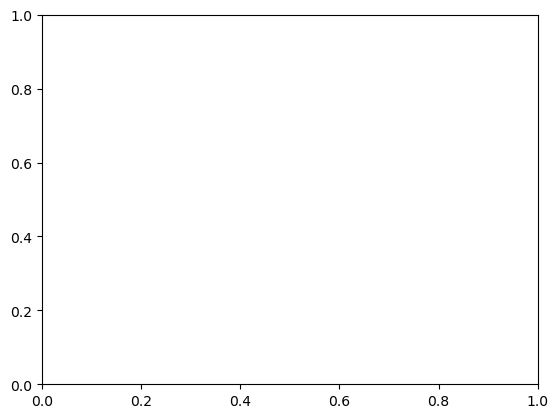

In [33]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('SLP with Softmax Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
#measure accuracy
# Predictions
predictions = predict(X)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import  Adam
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

data=make_moons(n_samples=1000,noise=0.2)
X=data[0]
y=data[1]
# print(X)
sc=StandardScaler()

x_fit = sc.fit_transform(X)
# print(x_fit)
model = Sequential([
    InputLayer(shape=(2,1)),
    Dense(units=64,activation="relu"),
    Dense(units=32,activation="relu"),
    Dense(units=1,activation="sigmoid")

])
model.compile(optimizer = Adam(learning_rate=0.01), loss = "binary_crossentropy",metrics = ["accuracy"])
history=model.fit(x = x_fit , y= y, epochs = 20 ,validation_split =0.2)


train_acc = history.history("accuracy")
val_acc= history.history("val_accuracy")
 

plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32,), output.shape=(32, 2, 1)

In [20]:
X

array([[ 1.03906236, -0.27393699],
       [ 1.04155344,  0.4227337 ],
       [ 1.16055545,  0.61539544],
       ...,
       [ 1.21751977, -0.68952193],
       [ 0.93918273, -0.60844941],
       [ 0.65558877,  0.70426165]])

In [21]:
y

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,